In [ ]:
import pandas as pd 
import numpy as np
import plotly.express as px
import csv
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller, kpss, acf, grangercausalitytests
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf,month_plot,quarter_plot
from scipy import signal
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline 
sns.set_style("whitegrid")
plt.rc('xtick', labelsize=15) 
plt.rc('ytick', labelsize=15) 

In [216]:

file = open("Takis.csv")
csvreader = csv.reader(file)
header = next(csvreader)

rows = []
for row in csvreader:
    rows.append(row)

file.close()

In [217]:
data = pd.read_csv('Takis.csv')

In [218]:
data

,Unnamed: 0,time,arm,reward
0,0,0,0,0
1,1,1,1,0
2,2,2,2,0
3,3,3,6,0
4,4,4,3,1
...,...,...,...,...
9995,9995,9995,0,0
9996,9996,9996,0,1
9997,9997,9997,0,0
9998,9998,9998,0,0


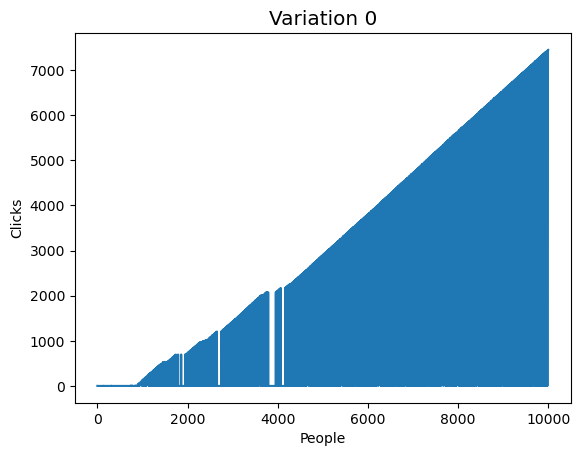

In [219]:
a = data.iloc[:,1]
b = data.iloc[:,2]


var_0 = np.zeros((10000))
var_1 = np.zeros((10000))
var_2 = np.zeros((10000))
var_3 = np.zeros((10000))
var_4 = np.zeros((10000))
var_5 = np.zeros((10000))
var_6 = np.zeros((10000))
var_7 = np.zeros((10000))
var = -1
for j in range (7):
    count = 0
    var = var + 1
    for i in range(len(a)):
            if b[i] == var:
                count = count + 1
                if var == 0:
                    var_0[i] = count
                elif var == 1:
                    var_1[i] = count
                elif var == 2:
                    var_2[i] = count
                elif var == 3:
                    var_3[i] = count
                elif var == 4:
                    var_4[i] = count   
                elif var == 5:
                    var_5[i] = count
                elif var == 6:
                    var_6[i] = count
                elif var == 7:
                    var_7[i] = count    


                    # import libraries


plt.style.use('default')

# creating the test data
x = np.linspace(10, 100,10)
y=np.power(x,3)

# rendering the chart

fig,ax= plt.subplots()
plt.style.use('ggplot')
ax.plot(a,var_0);
ax.set_title('Variation 0')
ax.set_xlabel('People')
ax.set_ylabel('Clicks');
 


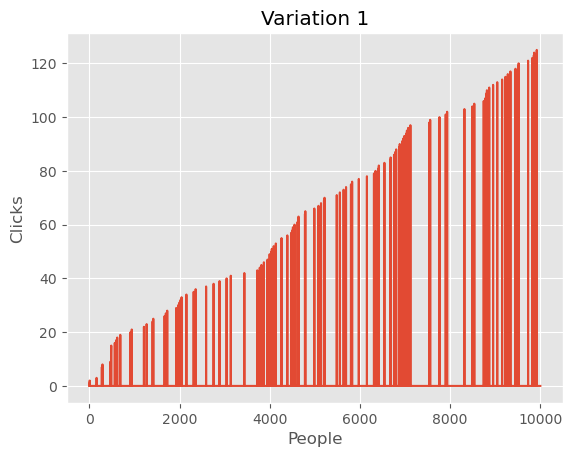

In [220]:
fig,ax= plt.subplots()
plt.style.use('ggplot')
ax.plot(a,var_1);
ax.set_title('Variation 1')
ax.set_xlabel('People')
ax.set_ylabel('Clicks');

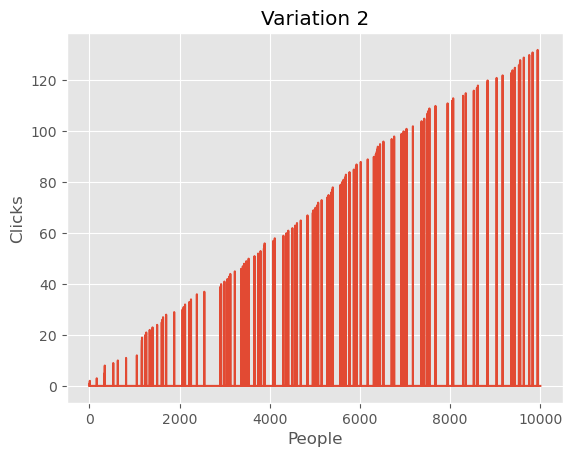

In [221]:
fig,ax= plt.subplots()
plt.style.use('ggplot')
ax.plot(a,var_2);
ax.set_title('Variation 2')
ax.set_xlabel('People')
ax.set_ylabel('Clicks');

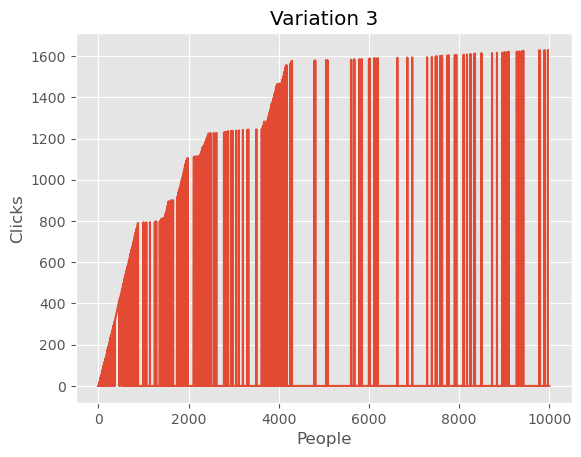

In [187]:
fig,ax= plt.subplots()
plt.style.use('ggplot')
ax.plot(a,var_3);
ax.set_title('Variation 3')
ax.set_xlabel('People')
ax.set_ylabel('Clicks');

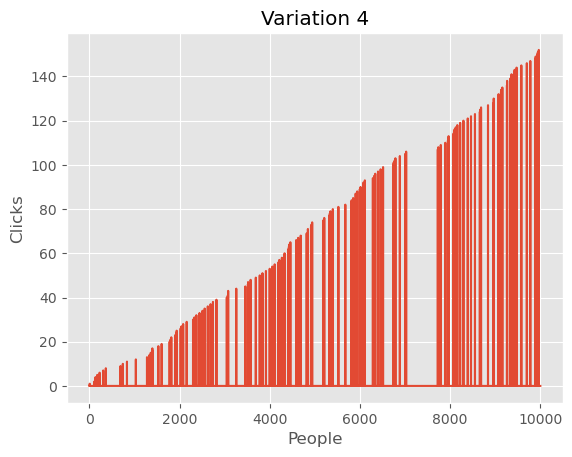

In [188]:
fig,ax= plt.subplots()
plt.style.use('ggplot')
ax.plot(a,var_4);
ax.set_title('Variation 4')
ax.set_xlabel('People')
ax.set_ylabel('Clicks');

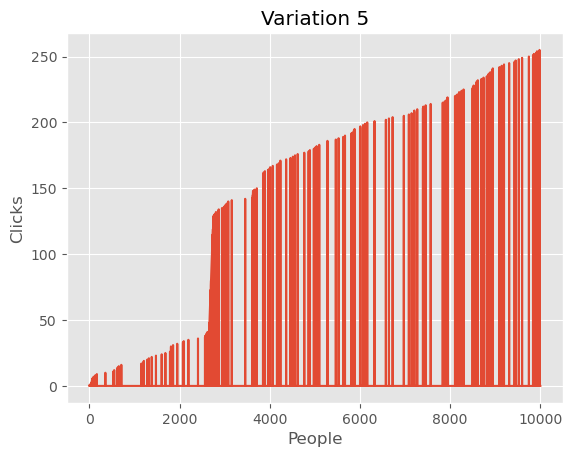

In [190]:
fig,ax= plt.subplots()
plt.style.use('ggplot')
ax.plot(a,var_5);
ax.set_title('Variation 5')
ax.set_xlabel('People')
ax.set_ylabel('Clicks');

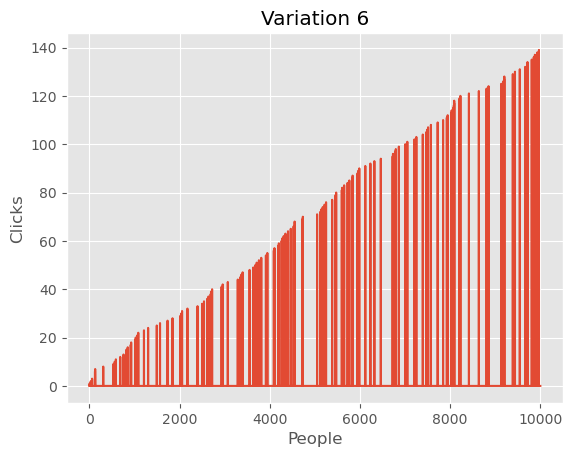

In [214]:
fig,ax= plt.subplots()
plt.style.use('ggplot')
ax.plot(a,var_6);
ax.set_title('Variation')
ax.set_xlabel('People')
ax.set_ylabel('Clicks');

In [196]:
data['hundred'] = np.round(data.time, -2)

In [197]:
data = data.groupby(['hundred', 'arm'])[['reward']].count().reset_index()
data.columns = ['idx', 'arm', 'count']
data['cumcount'] = data.groupby(['arm'])['count'].cumsum()

In [198]:
data

,idx,arm,count,cumcount
0,0,0,2,2
1,0,1,2,2
2,0,2,2,2
3,0,3,39,39
4,0,4,1,1
...,...,...,...,...
607,10000,0,46,7449
608,10000,3,1,1630
609,10000,4,1,152
610,10000,5,1,255


In [199]:
fig = px.area(dff, x="idx", y="arm", color="arm")
fig.show()

In [200]:
dff = data.groupby('arm').agg({'reward': ['count', 'sum']})

KeyError: "Column 'reward' does not exist!"

In [201]:
import itertools
pd.DataFrame(list(itertools.product(range(2), range(2), range(2))))

,0,1,2
0,0,0,0
1,0,0,1
2,0,1,0
3,0,1,1
4,1,0,0
5,1,0,1
6,1,1,0
7,1,1,1


In [202]:
dff.columns = ['impressions', 'clicks']

ValueError: Length mismatch: Expected axis has 4 elements, new values have 2 elements

In [203]:
meta = pd.DataFrame(list(itertools.product(range(2), range(2), range(2))))
dff['header'] = meta[0]
dff['description'] = meta[1]
dff['image'] = meta[2]

In [204]:
dff = dff[[
    'header', 'description', 'image', 'impressions', 'clicks',
]]
dff['ctr (%)'] = 100 * np.round(dff['clicks'] / dff['impressions'], 4)

KeyError: "['clicks', 'impressions'] not in index"

In [205]:
dff

,idx,arm,count,cumcount,header,description,image
0,0,0,2,2,0.0,0.0,0.0
1,0,1,2,2,0.0,0.0,1.0
2,0,2,2,2,0.0,1.0,0.0
3,0,3,39,39,0.0,1.0,1.0
4,0,4,1,1,1.0,0.0,0.0
...,...,...,...,...,...,...,...
607,10000,0,46,7449,NaN,NaN,NaN
608,10000,3,1,1630,NaN,NaN,NaN
609,10000,4,1,152,NaN,NaN,NaN
610,10000,5,1,255,NaN,NaN,NaN


In [206]:
dff = data.groupby('arm').agg({'reward': ['count', 'sum']})
dff = dff.reset_index()
dff.columns = ['combination', 'impressions', 'clicks']
meta = pd.DataFrame(list(itertools.product(range(2), range(2), range(2))))
dff['header'] = meta[0]
dff['description'] = meta[1]
dff['image'] = meta[2]
dff = dff[[
    'combination', 'header', 'description', 'image', 'impressions', 'clicks',
]]

KeyError: "Column 'reward' does not exist!"

In [207]:
dff = dff.groupby('header')[['impressions', 'clicks']].sum()

KeyError: "Columns not found: 'clicks', 'impressions'"

In [208]:
dff = dff.reset_index()

In [209]:
asset_type = 'header'

In [210]:
dff[asset_type] = f'{asset_type.title()} ' + dff[asset_type].apply(str)

In [211]:
dff['ctr (%)'] = (100 * np.round(dff['clicks'] / dff['impressions'], 4)).astype(str).apply(lambda x: x[:4])

KeyError: 'clicks'

In [212]:
dff

,index,idx,arm,count,cumcount,header,description,image
0,0,0,0,2,2,Header 0.0,0.0,0.0
1,1,0,1,2,2,Header 0.0,0.0,1.0
2,2,0,2,2,2,Header 0.0,1.0,0.0
3,3,0,3,39,39,Header 0.0,1.0,1.0
4,4,0,4,1,1,Header 1.0,0.0,0.0
...,...,...,...,...,...,...,...,...
607,607,10000,0,46,7449,Header nan,NaN,NaN
608,608,10000,3,1,1630,Header nan,NaN,NaN
609,609,10000,4,1,152,Header nan,NaN,NaN
610,610,10000,5,1,255,Header nan,NaN,NaN


In [213]:
dff['header'] = dff['header']